# DBSCAN : Density Based Spatial Clustering of Applications With Noise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN


In [3]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples   = 750, 
                            centers     = centers, 
                            cluster_std = 0.4,
                            random_state= 0)

In [4]:
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [5]:
type(X)

numpy.ndarray

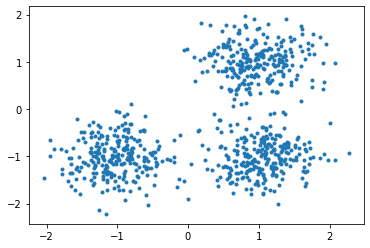

In [6]:
plt.plot(X[:,0],X[:,1],'.');

In [7]:
X = StandardScaler().fit_transform(X)

In [8]:
labels_true

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [9]:
# Compute DBSCAN
db = DBSCAN(eps=.3, min_samples=10)

In [10]:
db.fit(X)

DBSCAN(eps=0.3, min_samples=10)

In [11]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# labels for all the rows
print(labels[:10])

[0 1 0 2 0 1 1 2 0 0]


In [12]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

3


In [13]:
print('Estimated number of clusters: %d'    % n_clusters_)
print("Silhouette Coefficient      : %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Silhouette Coefficient      : 0.626


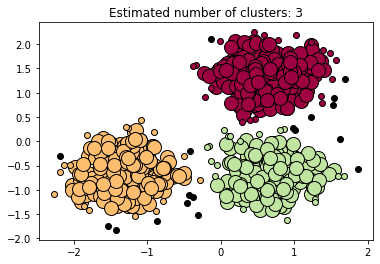

In [14]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [30]:
# define hyper parameters
eps_space = np.arange(0.1, 5, 0.1)
min_samples_space = np.arange(1, 25, 1)

In [16]:
eps_space

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [17]:
from collections import Counter 
# Example on counter
z = ['blue', 'red', 'blue', 'yellow', 'blue', 'red'] 

col_count = Counter(z) 

print(col_count) 

Counter({'blue': 3, 'red': 2, 'yellow': 1})


In [18]:
%%time
# Looping over each combination of hyperparameters

dbscan_clusters = []

# Starting a tally of total iterations
n_iterations = 0

for eps_val in eps_space:
    for samples_val in min_samples_space:    
        
        # instantiate DBSCAN
        dbscan = DBSCAN(eps = eps_val, min_samples = samples_val)
        
        # fit & predict
        
        # fit()) 	Perform DBSCAN clustering from features or distance matrix.
        # fit_predict() 	Performs clustering on X and returns cluster labels.
        clusters = dbscan.fit_predict(X = X)
        
        labels = dbscan.labels_

        # Counting the amount of data in each cluster
        cluster_count = Counter(clusters)
        
        # Saving the number of clusters
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters_ <= 1:
            dbscan_clusters.append([eps_val, samples_val, -11])
            continue;
        
        # Increasing the iteration tally with each run of the loop
        n_iterations += 1
        
        sil_score = metrics.silhouette_score(X, labels)
        
        dbscan_clusters.append([eps_val, samples_val, sil_score])

Wall time: 12.1 s


In [19]:
results = np.array(dbscan_clusters)

results_df = pd.DataFrame(results, columns=['eps', 'min_points', 'silhouette_score'])

results_df.shape

(1176, 3)

In [20]:
results_df

,eps,min_points,silhouette_score
0,0.1,1.0,-0.081956
1,0.1,2.0,-0.073350
2,0.1,3.0,-0.122569
3,0.1,4.0,-0.164328
4,0.1,5.0,-0.128400
...,...,...,...
1171,4.9,20.0,-11.000000
1172,4.9,21.0,-11.000000
1173,4.9,22.0,-11.000000
1174,4.9,23.0,-11.000000


In [21]:
# sort on the silhouette_score
results_df_sorted = results_df.sort_values(['silhouette_score'], ascending=False)
results_df_sorted

,eps,min_points,silhouette_score
94,0.4,23.0,0.631114
93,0.4,22.0,0.631114
92,0.4,21.0,0.631114
91,0.4,20.0,0.631114
56,0.3,9.0,0.628233
...,...,...,...
444,1.9,13.0,-11.000000
445,1.9,14.0,-11.000000
446,1.9,15.0,-11.000000
447,1.9,16.0,-11.000000


# Using the best parameters {eps, min_samples}

In [22]:
# instantiate DBSCAN
dbscan = DBSCAN(eps = 0.4, min_samples = 23)

# fit & predict

# fit()) 	Perform DBSCAN clustering from features or distance matrix.
# fit_predict() 	Performs clustering on X and returns cluster labels.
clusters = dbscan.fit_predict(X = X)

labels = dbscan.labels_

In [23]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

3


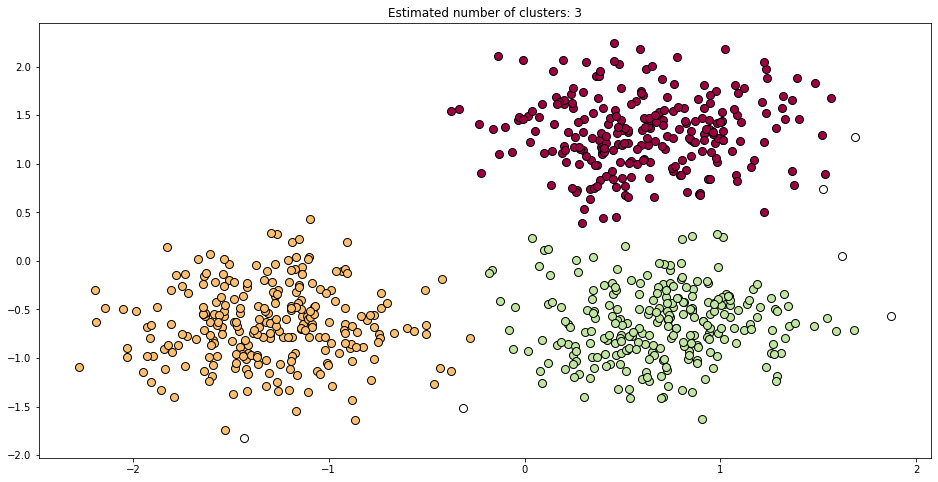

In [25]:
# Plot result
plt.figure(figsize=(16, 8))

# Black removed and is used for noise instead.
unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, .0001]

    class_member_mask = (labels == k)

    # for the given label and pick the core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], 
             xy[:, 1], 
             'o', 
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=8)

    # for the given label and pick the non core samples (outliers)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], 
             xy[:, 1], 
             'o', 
             markerfacecolor=col,
             markeredgecolor='k', 
             markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [26]:
print('Estimated number of clusters: %d'    % n_clusters_)
print("Silhouette Coefficient      : %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Silhouette Coefficient      : 0.631


**Silhouette Score:** 

The __silhouette score__ is calculated utilizing the mean intra- cluster distance between points, AND the mean nearest-cluster distance. For instance, a cluster with a lot of data points very close to each other (high density) AND is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong silhouette score. A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score. Silhouette scores of 0 suggest overlapping clusters.

**Inertia:**

__Inertia__ measures the internal cluster sum of squares (sum of squares is the sum of all residuals). Inertia is utilized to measure how related clusters are amongst themselves, the lower the inertia score the better. HOWEVER, it is important to note that inertia heavily relies on the assumption that the clusters are convex (of spherical shape). DBSCAN does not necessarily divide data into spherical clusters, therefore inertia is not a good metric to use for evaluating DBSCAN models Inertia is more often used in other clustering methods, such as K-means clustering.